# **Análise dos Resultados:**

In [7]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [8]:
#Importando as bibliotecas necessárias
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
df_sentimento_revisto = pd.read_csv('../output/sentimento_revisto.csv', index_col=0)

In [5]:
df_original = pd.read_csv('../output/cleaning_output.csv', index_col=0)

# **Comparação dos resultados obtidos dos modelos testados:**

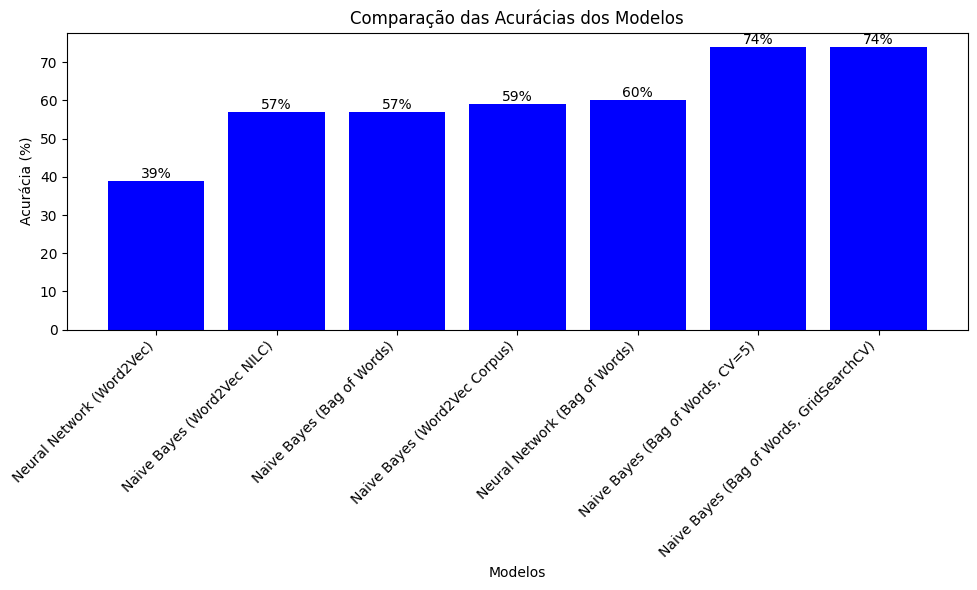

In [3]:
# Dados
models = [
    'Neural Network (Word2Vec)',
    'Naive Bayes (Word2Vec NILC)',
    'Naive Bayes (Bag of Words)',
    'Naive Bayes (Word2Vec Corpus)',
    'Neural Network (Bag of Words)',
    'Naive Bayes (Bag of Words, CV=5)',
    'Naive Bayes (Bag of Words, GridSearchCV)'
]
accuracies = [39, 57, 57, 59, 60, 74, 74]

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='blue')

# Adicionando os eixos no gráfico
plt.xlabel('Modelos')
plt.ylabel('Acurácia (%)')
plt.title('Comparação das Acurácias dos Modelos')

# Rotacionando as legendas para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adicionando os valores específicos no topo de cada coluna
for i, v in enumerate(accuracies):
    plt.text(i, v, str(v) + '%', ha='center', va='bottom')

# MOstrando o gráfico
plt.tight_layout()
plt.show()


# Contagem de sentimentos

Após as análises iniciais, foi identificado um alto número de comentários classificados como neutros e, a maioria deles, incluia comentários só com emojis e, dessa maneira, essa tag foi reclassificada na mão, sendo -1 negativo, 0, neutro e 1 positivo.

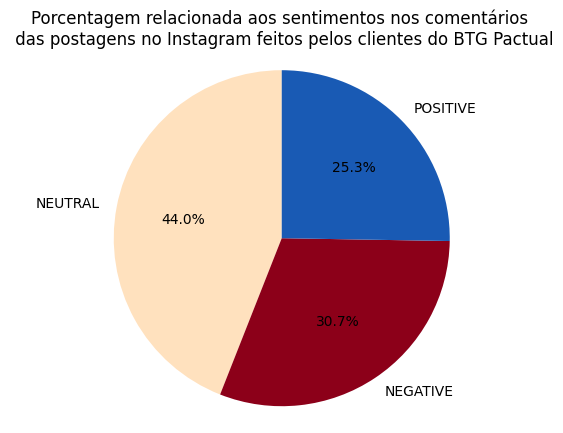

In [6]:
# Lista de cores
colors = ['#FFE1BE', '#8C0019', '#195AB4']

# Contagem de sentimentos
fellings = df_original['sentimento'].value_counts()

# Cria um gráfico de pizza com as contagens de sentimentos
fig, ax = plt.subplots()
ax.pie(fellings.values, labels=fellings.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax.axis('equal')

plt.title('Porcentagem relacionada aos sentimentos nos comentários \n das postagens no Instagram feitos pelos clientes do BTG Pactual')

# Mostra o gráfico
plt.show()

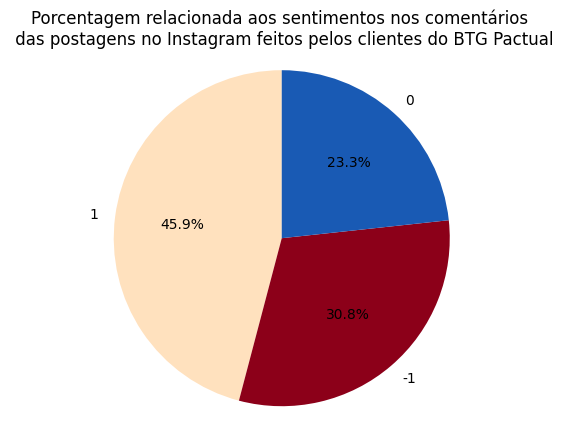

In [4]:
# Lista de cores
colors = ['#FFE1BE', '#8C0019', '#195AB4']

# Contagem de sentimentos
fellings = df_sentimento_revisto['sentimento_revisto'].value_counts()

# Cria um gráfico de pizza com as contagens de sentimentos
fig, ax = plt.subplots()
ax.pie(fellings.values, labels=fellings.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax.axis('equal')

plt.title('Porcentagem relacionada aos sentimentos nos comentários \n das postagens no Instagram feitos pelos clientes do BTG Pactual')

# Mostra o gráfico
plt.show()

# Comparações dos modelos

Foram feitos os mesmos modelos, entretanto que se diferenciam em dois pontos: target de sentimento, usado tanto da base original fornecida pelo stakeholder, quanto a revista, e no tipo de vetorização das frases, sendo Bag of Words, TF-IDF e Word2Vec.

## Bag of Words

Abaixo, as métricas obtidas utilizando Bag of Words

In [9]:

# Dados para a tabela
dados = [
    ["Naive Bayes Simples", 'Original', 54, 54],
    ["Naive Bayes Simples", 'Revisto', 70, 70],
    ["Naive Bayes com cross validation", "Original", 72 , 72],
    ["Naive Bayes com cross validation", "Revisto", 61 , 61],
    ["Naive Bayes com Grid Search e Cross Validation", "Original", 72, 72],
    ["Naive Bayes com Grid Search e Cross Validation","Revisto", 61, 61],
    ["Random Forest", "Original", 70, 70],
    ["Random Forest", "Revisto", 61, 61],
    ["Rede Neural", "Original", 58, 'Null'],
    ["Rede Neural", "Revisto", 47, 'Null']

]

# Cabeçalho da tabela
cabecalho = ["Modelo", "Dataset", "Acurácia", "Recall"]

# Exibir a tabela formatada
print(tabulate(dados, headers=cabecalho, tablefmt="fancy_grid"))


╒════════════════════════════════════════════════╤═══════════╤════════════╤══════════╕
│ Modelo                                         │ Dataset   │   Acurácia │ Recall   │
╞════════════════════════════════════════════════╪═══════════╪════════════╪══════════╡
│ Naive Bayes Simples                            │ Original  │         54 │ 54       │
├────────────────────────────────────────────────┼───────────┼────────────┼──────────┤
│ Naive Bayes Simples                            │ Revisto   │         70 │ 70       │
├────────────────────────────────────────────────┼───────────┼────────────┼──────────┤
│ Naive Bayes com cross validation               │ Original  │         72 │ 72       │
├────────────────────────────────────────────────┼───────────┼────────────┼──────────┤
│ Naive Bayes com cross validation               │ Revisto   │         61 │ 61       │
├────────────────────────────────────────────────┼───────────┼────────────┼──────────┤
│ Naive Bayes com Grid Search e Cross Valid

Analisando a tabela, é possível ver que os modelos com melhor resultado, tanto em acurácia, quanto em recall, foram o Naive Bayes Simples com cross validation com o dataset original e o Random Forest com o dataset original.

In [19]:
from IPython.display import display, Image, HTML

# Caminho para a imagem
caminho_imagem = '../images/matriz_confusao_NB_bow_original.png'
titulo = 'Matriz de Confusão Naive Bayes com Cross Validation com base original'

# Gerar o código HTML para exibir a imagem com título
html = f'<h2>{titulo}</h2><img src="{caminho_imagem}">'

# Exibir a imagem com título
display(HTML(html))

## TF-IDF

In [10]:

# Dados para a tabela
dados = [
    ["Naive Bayes Simples", 'Original', 53, 53],
    ["Naive Bayes Simples", 'Revisto', 69, 69],
    ["Naive Bayes com cross validation", "Original", 71 , 71],
    ["Naive Bayes com cross validation", "Revisto", 56 , 56],
    ["Naive Bayes com Grid Search e Cross Validation", "Original", 71, 71],
    ["Naive Bayes com Grid Search e Cross Validation","Revisto", 60, 60],
    ["Random Forest", "Original", 62, 62],
    ["Random Forest", "Revisto", 61, 61],
    ["Rede Neural", "Original", 57, 'Null'],
    ["Rede Neural", "Revisto", 46, 'Null']

]

# Cabeçalho da tabela
cabecalho = ["Modelo", "Dataset", "Acurácia", "Recall"]

# Exibir a tabela formatada
print(tabulate(dados, headers=cabecalho, tablefmt="fancy_grid"))


╒════════════════════════════════════════════════╤═══════════╤════════════╤══════════╕
│ Modelo                                         │ Dataset   │   Acurácia │ Recall   │
╞════════════════════════════════════════════════╪═══════════╪════════════╪══════════╡
│ Naive Bayes Simples                            │ Original  │         53 │ 53       │
├────────────────────────────────────────────────┼───────────┼────────────┼──────────┤
│ Naive Bayes Simples                            │ Revisto   │         69 │ 69       │
├────────────────────────────────────────────────┼───────────┼────────────┼──────────┤
│ Naive Bayes com cross validation               │ Original  │         71 │ 71       │
├────────────────────────────────────────────────┼───────────┼────────────┼──────────┤
│ Naive Bayes com cross validation               │ Revisto   │         56 │ 56       │
├────────────────────────────────────────────────┼───────────┼────────────┼──────────┤
│ Naive Bayes com Grid Search e Cross Valid

Analisando a tabela, é possível ver que os modelos com melhor resultado, tanto em acurácia, quanto em recall, foi o Naive Bayes com cross validation com o dataset original.

### Matrizes de confusão 

In [14]:
from IPython.display import display, Image, HTML

# Caminho para a imagem
caminho_imagem = '../images/matriz_confusao_NB_original.png'
titulo = 'Matriz de Confusão Naive Bayes com base original'

# Gerar o código HTML para exibir a imagem com título
html = f'<h2>{titulo}</h2><img src="{caminho_imagem}">'

# Exibir a imagem com título
display(HTML(html))


In [15]:
from IPython.display import display, Image, HTML

# Caminho para a imagem
caminho_imagem = '../images/matriz_confusao_NB_revisto.png'
titulo = 'Matriz de Confusão Naive Bayes com base revista'

# Gerar o código HTML para exibir a imagem com título
html = f'<h2>{titulo}</h2><img src="{caminho_imagem}">'

# Exibir a imagem com título
display(HTML(html))


In [16]:
from IPython.display import display, Image, HTML

# Caminho para a imagem
caminho_imagem = '../images/matriz_confusao_RD_original.png'
titulo = 'Matriz de Confusão Random Forest com base original'

# Gerar o código HTML para exibir a imagem com título
html = f'<h2>{titulo}</h2><img src="{caminho_imagem}">'

# Exibir a imagem com título
display(HTML(html))


In [18]:
from IPython.display import display, Image, HTML

# Caminho para a imagem
caminho_imagem = '../images/matriz_confusao_RD_revisto.png'
titulo = 'Matriz de Confusão Random Forest com base revista'

# Gerar o código HTML para exibir a imagem com título
html = f'<h2>{titulo}</h2><img src="{caminho_imagem}">'

# Exibir a imagem com título
display(HTML(html))


Após a análise das matrizes, deve-se lembrar que o foco do modelo de processamento de linguagem natural é identificar, principalmente, comentários com sentimento negativo e, dessa maneira, os modelos que utilizaram a base revista identificaram melhor comentários negativos e positivos, diferente da base original, que mais acerta comentários neutros.